# init

In [ ]:
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.io.arff import loadarff

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

recommendation_table_path = "drive/My Drive/Mestrado/data/recommendation table/recommendation-table.csv"

ccTable = "drive/My Drive/Mestrado/data/recommender/meta-table-cc.csv"
dysTable = "drive/My Drive/Mestrado/data/recommender/meta-table-dys.csv"
accTable = "drive/My Drive/Mestrado/data/recommender/meta-table-acc.csv"
msTable = "drive/My Drive/Mestrado/data/recommender/meta-table-ms.csv"
algList = ['CC', 'DyS', 'ACC', 'MS']
pathList = [ccTable, dysTable, accTable, msTable]

path_arff = "drive/My Drive/Mestrado/data/datasets/arff/"
path_index = "drive/My Drive/Mestrado/data/index/arff/"
files_arff = os.listdir(path_arff)

path = "drive/My Drive/Mestrado/data/experimento/datasets/selected/cleaned/"
files = os.listdir(path)

Mounted at /content/drive


# load datasets

In [ ]:
i = 0
dataframe = None
X = None
y = None
X_list = []
y_list = []

for f in files:
  if i == 9 or i == 14:
    i += 1
    continue

  df = pd.read_csv(path + f)
  df = df.dropna()

  if i == 0:
    df.drop('author', axis=1, inplace=True)

  y = df.pop(df.columns[-1])
  X = df

  # y_list.append(y.to_numpy())
  # X_list.append(X.to_numpy())
  X_list.append(X)
  y_list.append(y)

  i += 1

df_list = []
for f in files_arff:
  data = loadarff(path_arff + f)
  dataframe = pd.DataFrame(data[0])

  catCols = [col for col in dataframe.columns if dataframe[col].dtype=="O"]
  dataframe[catCols] = dataframe[catCols].apply(lambda x: x.str.decode('utf8'))

  dataframe.replace(dataframe.mode()['class'][0], 1, inplace=True)
  dataframe['class'].mask(dataframe['class'] != 1, 0, inplace=True)

  y = (dataframe.pop('class'))
  X = dataframe

  # X_list.append(X.to_numpy())
  # y_list.append((y.to_numpy()).astype(int))
  X_list.append(X)
  y_list.append(y.astype(int))

ignore_list = [24, 27, 28, 34, 35, 38, 50, 51, 61, 64, 71, 74, 80, 82, 98, 111, 116, 119, 129, 143, 144, 148, 149, 155, 156, 157, 159, 160]
i = len(X_list)

# temp_list = []
while i >= 0:
  if i in ignore_list:
    del X_list[i]
    del y_list[i]
  i -= 1

i = 0

# É PRECISO SER FEITO ISSO POR QUE A INSTÂNCIA DE POS 82 NA
# METATABELA POSSUI VALORES INVÁLIDOS PARA O ALGORITMO DE
# ÁRVORE DE DECISÃO
del X_list[82]
del y_list[82]

len(y_list)

133

# load absolute error for each dataset from each algorithm

In [ ]:
abs_error_dict = {}
i = 0
for path in pathList:
  table = pd.read_csv(path)
  table.drop(82, inplace = True)
  data = table.values
  abs_error_list = data[:, -1]
  abs_error_dict[str(algList[i])] = abs_error_list
  i += 1

In [ ]:
recommendation_table = pd.read_csv(recommendation_table_path)
abs_error_ideal_list = recommendation_table['abs-error-ideal'].values
quantifier_ideal_list = recommendation_table['quantifier-ideal-num'].values

abs_error_recommended_list = recommendation_table['abs-error-recommended'].values
quantifier_recommended_list = recommendation_table['quantifier-recommended-num'].values

In [ ]:
recommendation_table = recommendation_table.sort_values(by=['abs-error-ideal'])
recommendation_table

,abs-error-CC,abs-error-CC-predicted,abs-error-DyS,abs-error-DyS-predicted,abs-error-ACC,abs-error-ACC-predicted,abs-error-MS,abs-error-MS-predicted,abs-error-ideal,quantifier-ideal,quantifier-ideal-num,abs-error-recommended,quantifier-recommended,quantifier-recommended-num
132,0.000,0.020592,0.003,0.027875,0.000,0.022932,0.000,0.018039,0.000,CC,0,0.018039,MS,3
126,0.000,0.025212,0.013,0.032052,0.000,0.045450,0.000,0.030756,0.000,CC,0,0.025212,CC,0
112,0.000,0.051928,0.031,0.094804,0.011,0.055336,0.004,0.056606,0.000,CC,0,0.051928,CC,0
42,0.000,0.130207,0.006,0.070017,0.000,0.089315,0.004,0.078173,0.000,CC,0,0.070017,DyS,1
110,0.000,0.087196,0.000,0.049236,0.000,0.120863,0.000,0.095480,0.000,CC,0,0.049236,DyS,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,0.405,0.220630,0.451,0.171504,0.444,0.261207,0.421,0.197200,0.405,CC,0,0.171504,DyS,1
114,0.444,0.179661,0.453,0.188933,0.452,0.243835,0.471,0.169275,0.444,CC,0,0.169275,MS,3
54,0.500,0.314740,0.451,0.147292,0.500,0.290842,0.500,0.270377,0.451,DyS,1,0.147292,DyS,1
30,0.486,0.301618,0.476,0.174815,0.507,0.267813,0.500,0.265595,0.476,DyS,1,0.174815,DyS,1


# calculate and plot AUC versus Algorithm (eg. AUC x CC, AUC x DyS)

In [ ]:
auc_list = []
clf = RandomForestClassifier(n_estimators=500, random_state=42)
for i in range(0, len(X_list)):
  X = X_list[i]
  y = y_list[i]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

  clf.fit(X_train, y_train)

  y_prediction_proba = clf.predict_proba(X_test)[::,1]

  auc_list.append(metrics.roc_auc_score(y_test, y_prediction_proba))

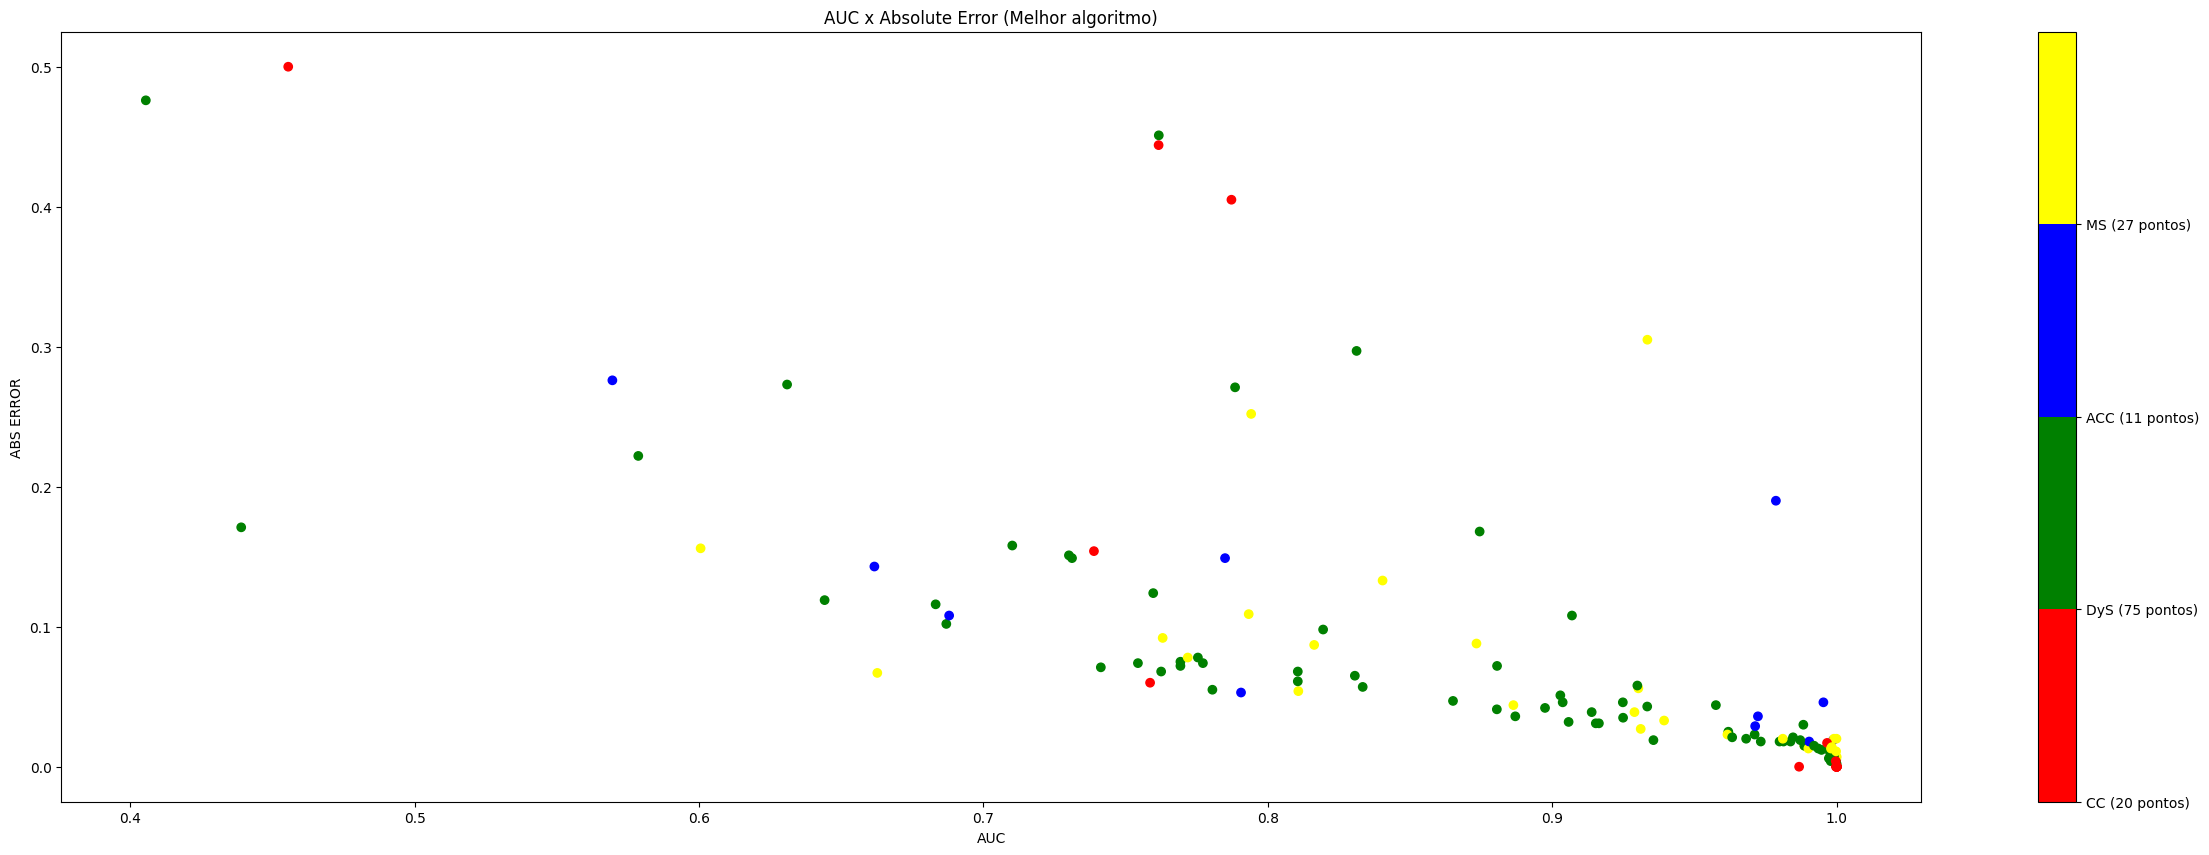

In [ ]:
x = auc_list
y = abs_error_ideal_list
label = quantifier_ideal_list
colors = ['red', 'green', 'blue', 'yellow']

fig = plt.figure(figsize=(30,10))
plt.scatter(x, y, c=label, cmap=matplotlib.colors.ListedColormap(colors))

plt.title("AUC x Absolute Error (Melhor algoritmo)")
plt.xlabel("AUC")
plt.ylabel("ABS ERROR")

cb = plt.colorbar()
loc = np.arange(0,max(label),max(label)/float(len(colors)))
cb.set_ticks(loc)

unique, counts = np.unique(quantifier_ideal_list, return_counts=True)
counts = dict(zip(unique, counts))

cb.set_ticklabels(['CC (' + str(counts[0]) + ' pontos)',
                   'DyS (' + str(counts[1]) + ' pontos)',
                   'ACC (' + str(counts[2]) + ' pontos)',
                   'MS (' + str(counts[3]) + ' pontos)'])

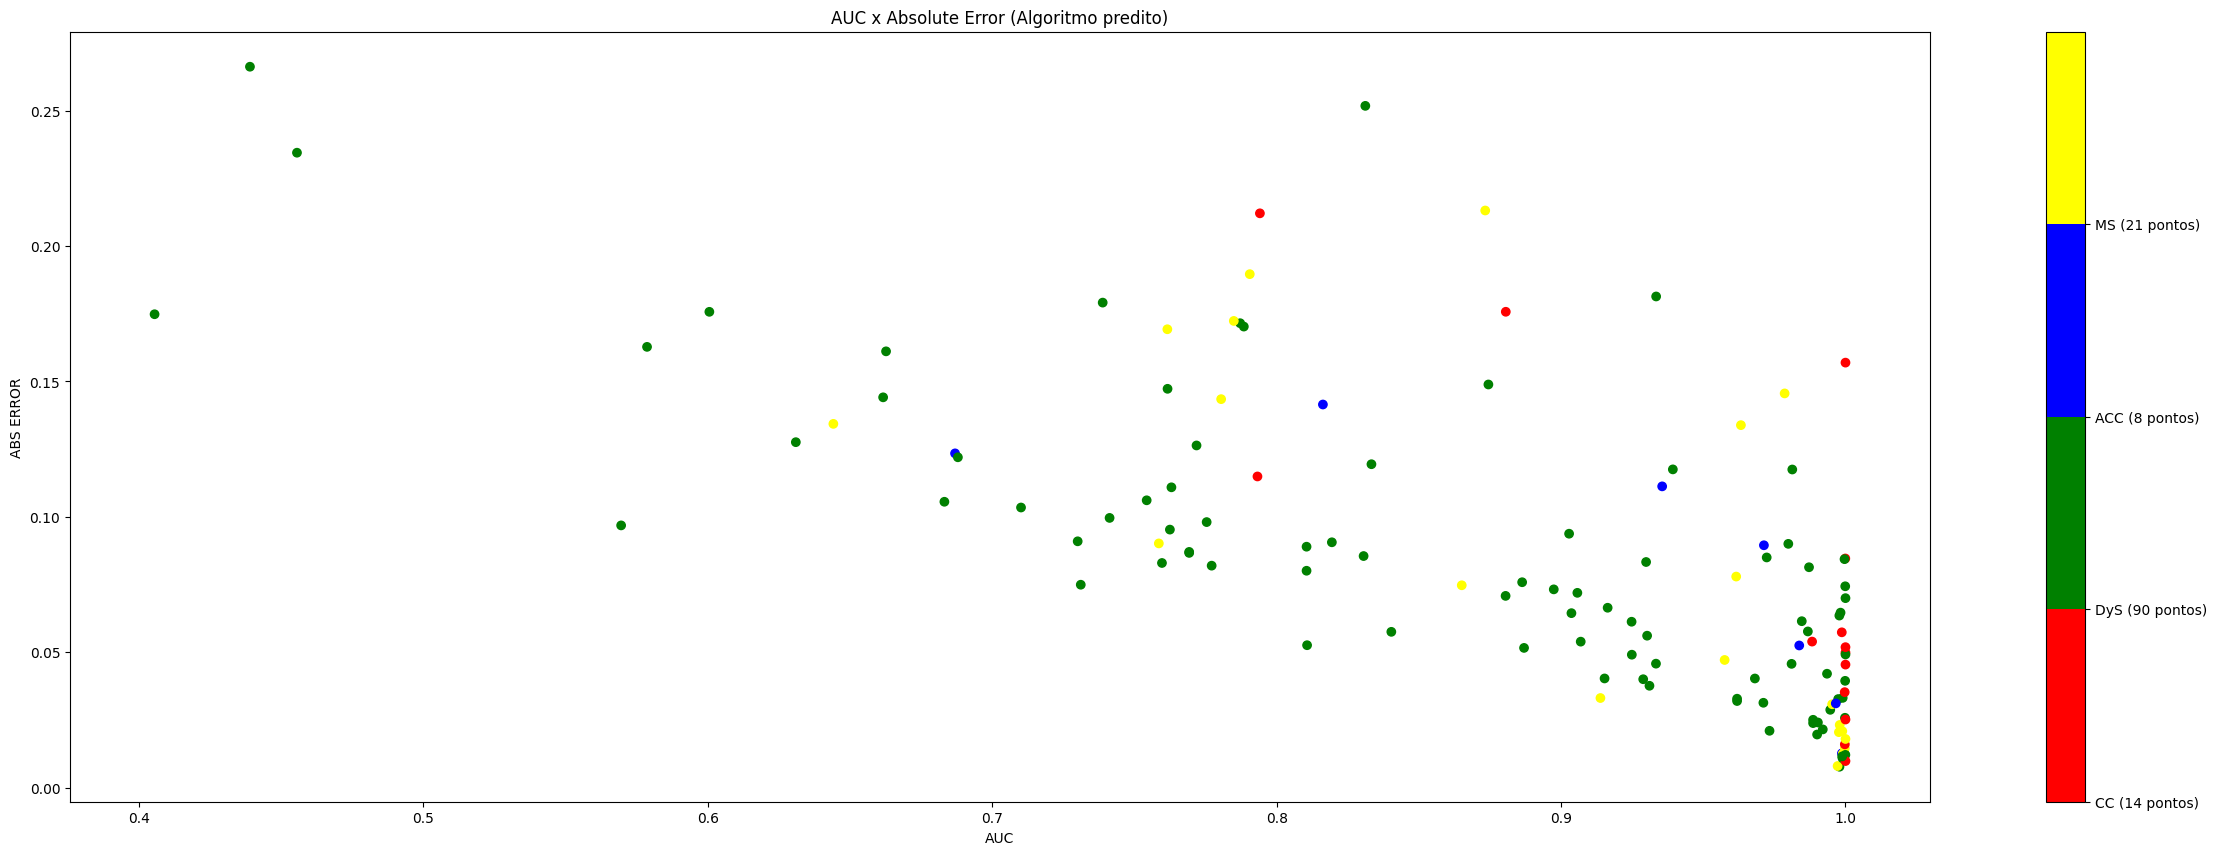

In [ ]:
x = auc_list
y = abs_error_recommended_list
label = quantifier_recommended_list
colors = ['red', 'green', 'blue', 'yellow']

fig = plt.figure(figsize=(30,10))
plt.scatter(x, y, c=label, cmap=matplotlib.colors.ListedColormap(colors))

plt.title("AUC x Absolute Error (Algoritmo predito)")
plt.xlabel("AUC")
plt.ylabel("ABS ERROR")

cb = plt.colorbar()
loc = np.arange(0,max(label),max(label)/float(len(colors)))
cb.set_ticks(loc)

unique, counts = np.unique(quantifier_recommended_list, return_counts=True)
counts = dict(zip(unique, counts))

cb.set_ticklabels(['CC (' + str(counts[0]) + ' pontos)',
                   'DyS (' + str(counts[1]) + ' pontos)',
                   'ACC (' + str(counts[2]) + ' pontos)',
                   'MS (' + str(counts[3]) + ' pontos)'])

[ True  True False False  True False  True  True False  True  True  True
 False False  True False  True  True  True  True False False  True False
  True False False  True  True  True  True  True  True  True  True  True
  True False  True False False  True False False  True  True False False
 False False False  True  True False  True False False False  True  True
  True False  True  True False False False False False  True  True False
 False False  True False  True False  True  True  True  True  True False
 False  True False  True  True  True  True False False False  True  True
  True  True False False False False  True  True False  True  True False
 False False False False  True  True False False False  True  True  True
  True  True False False  True  True  True False False False False  True
 False]


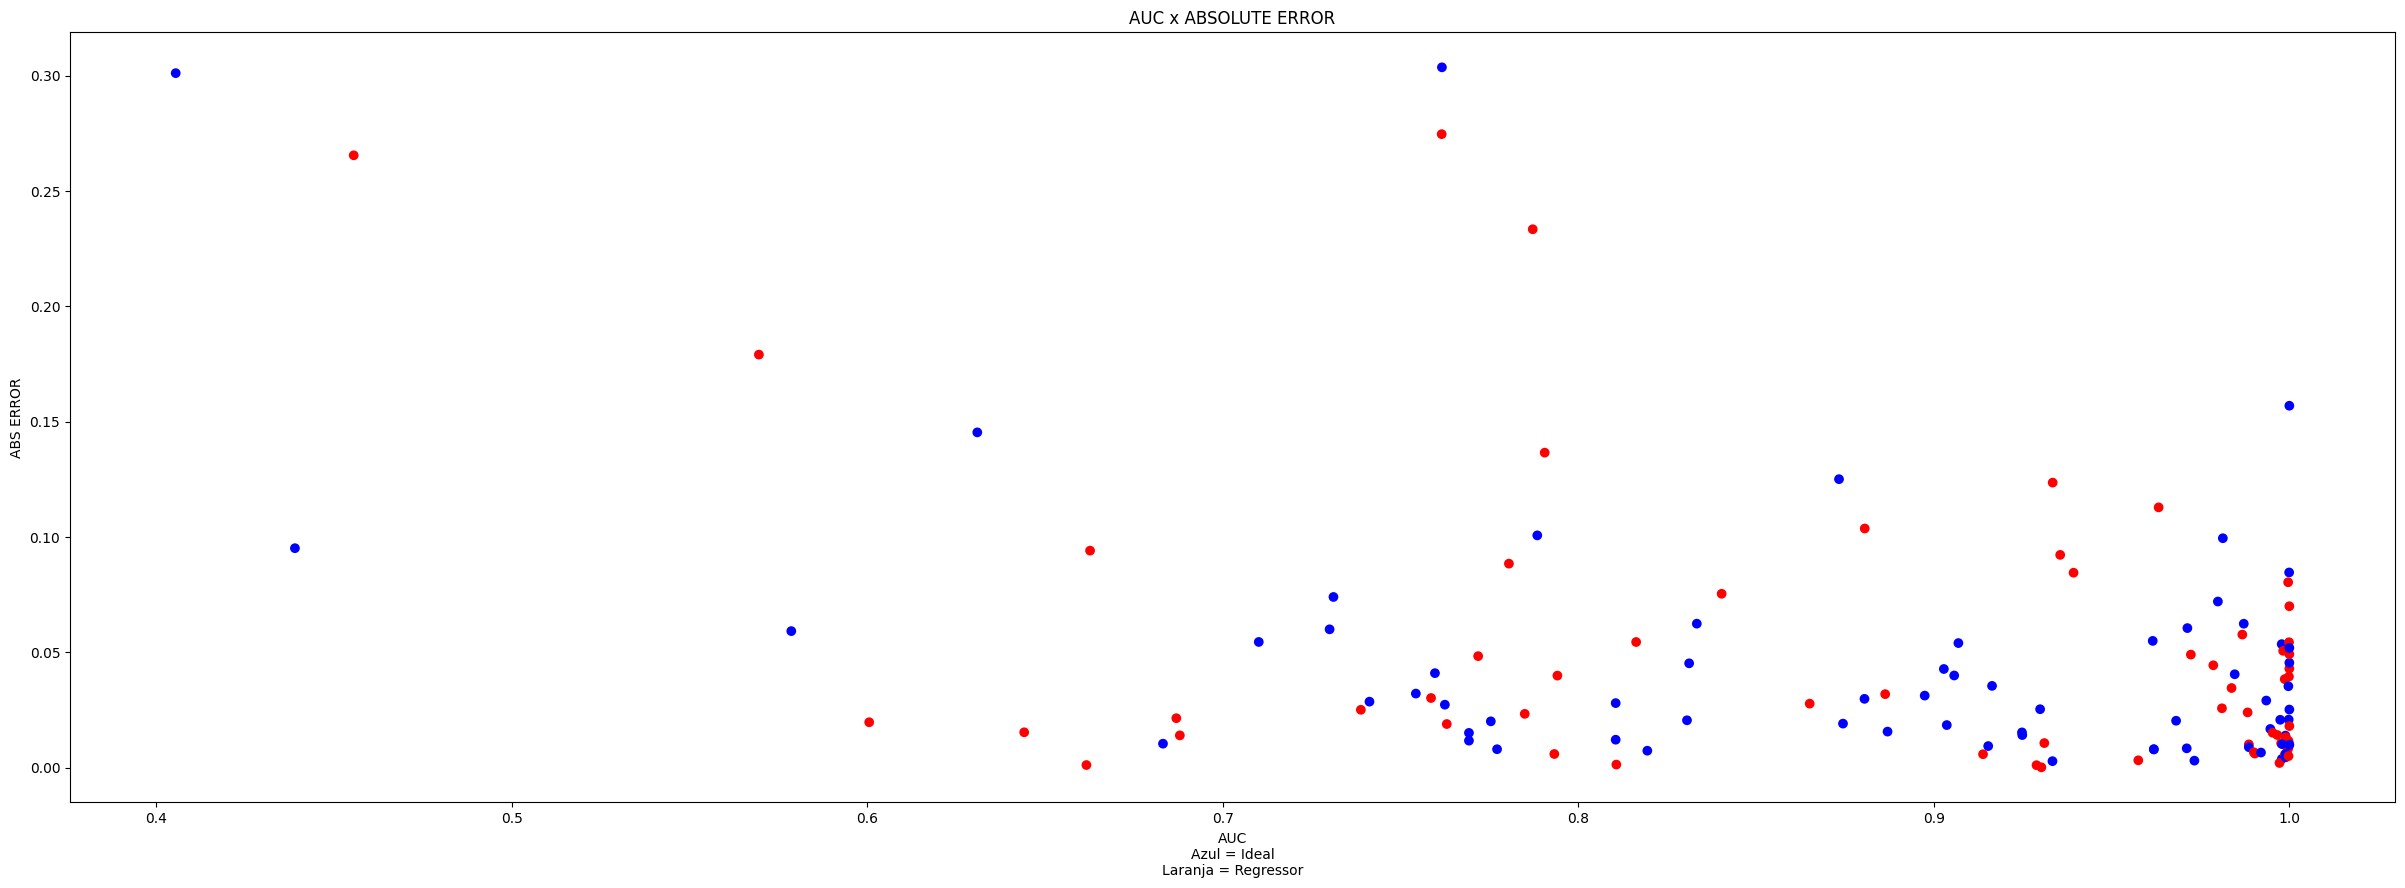

0.005
0.0258534999999999
0.046309973827425674
0.05764975119438156


In [ ]:
x = auc_list

y1 = abs_error_ideal_list
y2 = abs_error_recommended_list

y3 = quantifier_ideal_list == quantifier_recommended_list
colors = ['red', 'blue']

print(y3)

plt.figure(figsize=(30,10))

plt.title('AUC x ABSOLUTE ERROR')
plt.xlabel('AUC\nAzul = Ideal\nLaranja = Regressor')
plt.ylabel('ABS ERROR')

plt.scatter(x, abs(y1-y2), c=y3, cmap=matplotlib.colors.ListedColormap(colors))
# plt.scatter(x, y2)

plt.show()

print(y1[0])
print(y2[0])
print(np.mean(abs(y1-y2)))
print(np.std(abs(y1-y2)))

Text(0, 0.5, 'ABS ERROR')

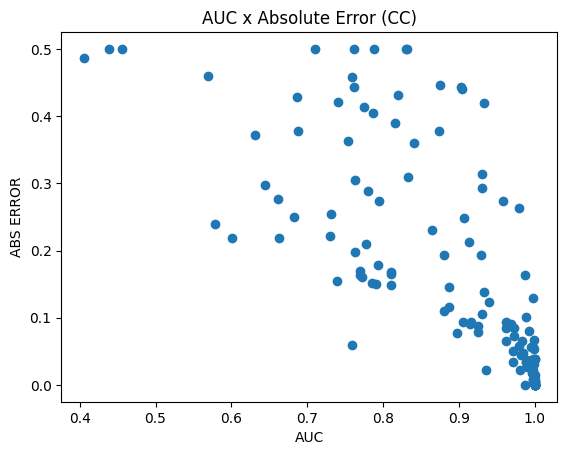

In [ ]:
# AUC x CC

x = auc_list
y = abs_error_dict['CC']

plt.plot(x, y, 'o')

plt.title("AUC x Absolute Error (CC)")
plt.xlabel("AUC")
plt.ylabel("ABS ERROR")

Text(0, 0.5, 'ABS ERROR')

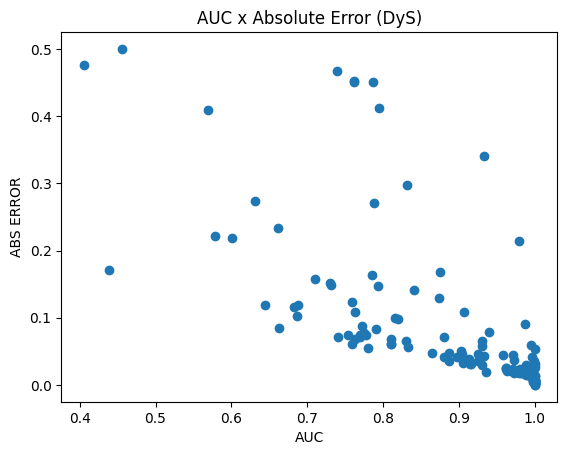

In [ ]:
# AUC x DyS

x = auc_list
y = abs_error_dict['DyS']

plt.plot(x, y, 'o')

plt.title("AUC x Absolute Error (DyS)")
plt.xlabel("AUC")
plt.ylabel("ABS ERROR")

Text(0, 0.5, 'ABS ERROR')

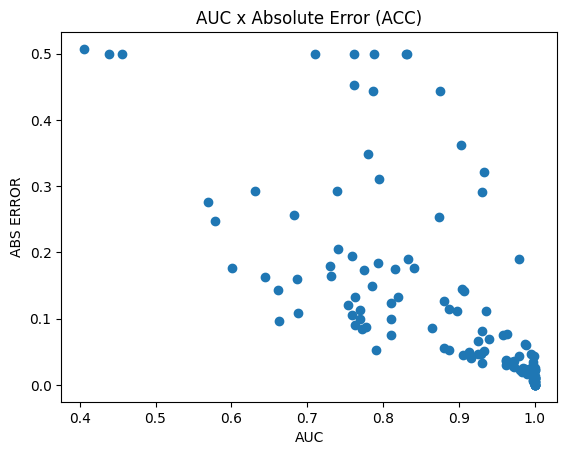

In [ ]:
# AUC x ACC

x = auc_list
y = abs_error_dict['ACC']

plt.plot(x, y, 'o')

plt.title("AUC x Absolute Error (ACC)")
plt.xlabel("AUC")
plt.ylabel("ABS ERROR")

Text(0, 0.5, 'ABS ERROR')

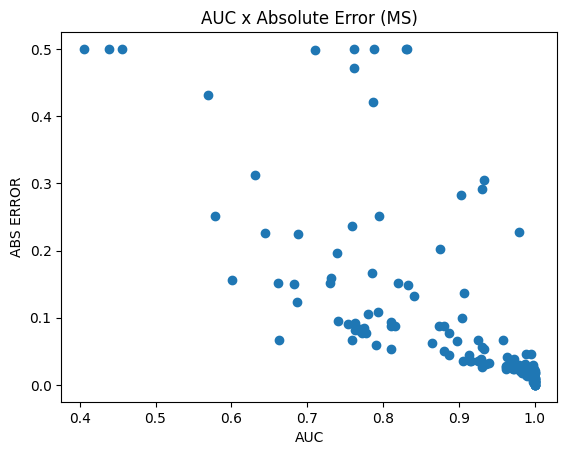

In [ ]:
# AUC x MS

x = auc_list
y = abs_error_dict['MS']

plt.plot(x, y, 'o')

plt.title("AUC x Absolute Error (MS)")
plt.xlabel("AUC")
plt.ylabel("ABS ERROR")

In [ ]:
abs_error_dict['CC']

array([0.007, 0.031, 0.034, 0.066, 0.056, 0.005, 0.169, 0.363, 0.106,
       0.008, 0.084, 0.084, 0.01 , 0.004, 0.011, 0.009, 0.091, 0.045,
       0.305, 0.094, 0.429, 0.053, 0.413, 0.161, 0.048, 0.273, 0.004,
       0.079, 0.249, 0.21 , 0.486, 0.221, 0.093, 0.058, 0.372, 0.034,
       0.254, 0.   , 0.421, 0.038, 0.149, 0.378, 0.   , 0.031, 0.44 ,
       0.01 , 0.116, 0.218, 0.264, 0.022, 0.405, 0.065, 0.034, 0.378,
       0.5  , 0.5  , 0.314, 0.46 , 0.145, 0.022, 0.31 , 0.198, 0.25 ,
       0.458, 0.154, 0.273, 0.057, 0.178, 0.277, 0.003, 0.194, 0.   ,
       0.067, 0.017, 0.   , 0.15 , 0.138, 0.022, 0.034, 0.5  , 0.077,
       0.443, 0.24 , 0.39 , 0.039, 0.051, 0.297, 0.5  , 0.431, 0.   ,
       0.011, 0.288, 0.419, 0.218, 0.   , 0.165, 0.087, 0.   , 0.123,
       0.212, 0.073, 0.129, 0.5  , 0.5  , 0.037, 0.   , 0.5  , 0.037,
       0.23 , 0.101, 0.   , 0.004, 0.   , 0.091, 0.444, 0.06 , 0.026,
       0.08 , 0.039, 0.163, 0.094, 0.446, 0.36 , 0.092, 0.164, 0.293,
       0.   , 0.015,